In [1]:
#Importing necessary libraries
import pandas as pd
from sklearn import tree
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
% matplotlib inline

In [2]:
#Reading the files
train_dataset = pd.read_csv("D:/Machine Learning/UPX/Projects/Machine Learning Projects/Datasets/Loan_prediction/train_loan.csv")
test_dataset = pd.read_csv("D:/Machine Learning/UPX/Projects/Machine Learning Projects/Datasets/Loan_prediction/test_loan.csv")

In [3]:
train_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
train_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
test_dataset.isnull().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area          0
Loan_Status          367
dtype: int64

In [7]:
train_dataset.shape

(614, 13)

In [8]:
test_dataset.shape

(367, 13)

### Handling Categorical data and Null Values
* Replacing NaN values with Unknown for the columns: Gender,married,Graduate,Self-Employed,Preperty_Area,Dependents & Credit_History in Train and Test dataset.
* Replacing NaN values with mean values for the columns: LoanAmount & Loan_Amount_Term

In [9]:
#Replacing male with 0 and female with 1 for the column Gender
train_dataset["Gender"] = train_dataset["Gender"].apply(lambda Gender: 0 if Gender == 'Male' else 1 if Gender == 'Female' else 'Unknown')
test_dataset["Gender"] = test_dataset["Gender"].apply(lambda Gender: 0 if Gender == 'Male' else 1 if Gender == 'Female' else 'Unknown')
train_dataset["Gender"].head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: object

In [10]:
#Replacing Yes with 1 and No with 0 for the column Married
train_dataset["Married"] = train_dataset["Married"].apply(lambda Married: 1 if Married == 'Yes' else 0 if Married == 'No' else 'Unknown')
test_dataset["Married"] = test_dataset["Married"].apply(lambda Married: 1 if Married == 'Yes' else 0 if Married == 'No' else 'Unknown')
train_dataset["Married"].head()

0    0
1    1
2    1
3    1
4    0
Name: Married, dtype: object

In [11]:
#Replacing Graduate with 1 and Not Graduate with 0 for the column Education
train_dataset["Education"] = train_dataset["Education"].apply(lambda Education: 1 if Education == 'Graduate' else 0)
test_dataset["Education"] = test_dataset["Education"].apply(lambda Education: 1 if Education == 'Graduate' else 0)
train_dataset["Education"].head()

0    1
1    1
2    1
3    0
4    1
Name: Education, dtype: int64

In [12]:
#Replacing Yes with 1 and No with 0 for the column Self_Employed
train_dataset["Self_Employed"] = train_dataset["Self_Employed"].apply(lambda Self_Employed: 1 if Self_Employed == 'Yes' else 0 if Self_Employed == 'No' else 'Unknown')
test_dataset["Self_Employed"] = test_dataset["Self_Employed"].apply(lambda Self_Employed: 1 if Self_Employed == 'Yes' else 0 if Self_Employed == 'No' else 'Unknown')
train_dataset["Self_Employed"].head()

0    0
1    0
2    1
3    0
4    0
Name: Self_Employed, dtype: object

In [13]:
#Replacing Rural with 0, Semiurban with 1 and Urban with 2 for the column Property_Area
train_dataset["Property_Area"] = train_dataset["Property_Area"].apply(lambda Property_Area: 1 if Property_Area == 'Semiurban' else 2 if Property_Area == 'Urban' else 0)
test_dataset["Property_Area"] = test_dataset["Property_Area"].apply(lambda Property_Area: 1 if Property_Area == 'Semiurban' else 2 if Property_Area == 'Urban' else 0)
train_dataset["Property_Area"].head(10)

0    2
1    0
2    2
3    2
4    2
5    2
6    2
7    1
8    2
9    1
Name: Property_Area, dtype: int64

In [14]:
#Replacing Yes with 1 and No with 0 for the column Loan_Status
train_dataset["Loan_Status"] = train_dataset["Loan_Status"].apply(lambda Loan_Status: 1 if Loan_Status == 'Y' else 0)
train_dataset["Loan_Status"].head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [15]:
#Replacing 0 with 0, 1 with 1 , 2 with 2 and 3+ with 3 for the column Dependents
train_dataset["Dependents"] = train_dataset["Dependents"].apply(lambda Dependents: 1 if Dependents == '1' else 2 if Dependents == '2' else 3 if Dependents == '3+' else 0 if Dependents == '0' else 'Unknown')
test_dataset["Dependents"] = test_dataset["Dependents"].apply(lambda Dependents: 1 if Dependents == '1' else 2 if Dependents == '2' else 3 if Dependents == '3+' else 0 if Dependents == '0' else 'Unknown')
train_dataset["Dependents"].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: object

In [16]:
# Changing Credit_History column to categorical
train_dataset["Credit_History"] = train_dataset["Credit_History"].apply(lambda Credit_History: 1 if Credit_History == 1.0 else 0 if Credit_History == 0.0 else 'Unknown')
test_dataset["Credit_History"] = test_dataset["Credit_History"].apply(lambda Credit_History: 1 if Credit_History == 1.0 else 0 if Credit_History == 0.0 else 'Unknown')
train_dataset["Credit_History"].head()

0    1
1    1
2    1
3    1
4    1
Name: Credit_History, dtype: object

In [17]:
# replacing Null vales of LoanAmount and Loan_Amount_Term column

train_dataset["Loan_Amount_Term"] = train_dataset["Loan_Amount_Term"].fillna(train_dataset["Loan_Amount_Term"].mean())
test_dataset["Loan_Amount_Term"] = test_dataset["Loan_Amount_Term"].fillna(test_dataset["Loan_Amount_Term"].mean())
train_dataset["LoanAmount"] = train_dataset["LoanAmount"].fillna(train_dataset["LoanAmount"].mean())
test_dataset["LoanAmount"] = test_dataset["LoanAmount"].fillna(test_dataset["LoanAmount"].mean())

In [18]:
test_dataset.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [19]:
train_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
train_dataset['income'] = train_dataset['ApplicantIncome'] + train_dataset['CoapplicantIncome']
test_dataset['income'] = test_dataset['ApplicantIncome'] + test_dataset['CoapplicantIncome']

In [21]:
train_dataset.drop(['ApplicantIncome', 'CoapplicantIncome'],axis = 1, inplace = True )
test_dataset.drop(['ApplicantIncome', 'CoapplicantIncome'],axis = 1, inplace = True )

In [22]:
train_dataset['EMI'] = (train_dataset['LoanAmount']*pow((9.5/12)+1,
                                 (train_dataset['Loan_Amount_Term']))*9.5/12)/(pow(9.5/12+1,
                                 (train_dataset['Loan_Amount_Term']) - 1))
test_dataset['EMI'] = (test_dataset['LoanAmount']*pow((9.5/12)+1,
                                 (test_dataset['Loan_Amount_Term']))*9.5/12)/(pow(9.5/12+1,
                                 (test_dataset['Loan_Amount_Term']) - 1))

In [23]:
#EMI to income ratio
train_dataset['Ratio'] = train_dataset['EMI']/train_dataset['income']
test_dataset['Ratio'] = test_dataset['EMI']/test_dataset['income']

In [24]:
train_dataset.drop(['EMI'],axis = 1, inplace = True )
test_dataset.drop(['EMI'],axis = 1, inplace = True )

### Exploratory Data Analysis

* Education & Applicant's Income are postively corelated with LoanAmount.
* Property Area is postively corelated with Loan Status.

In [25]:
train_dataset.corr()

,Education,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,income,Ratio
Education,1.000000,0.166998,0.077242,0.065243,0.085884,0.161362,-0.081314
LoanAmount,0.166998,1.000000,0.038801,-0.044776,-0.036416,0.620102,0.151715
Loan_Amount_Term,0.077242,0.038801,1.000000,-0.077620,-0.020974,-0.069830,0.163355
Property_Area,0.065243,-0.044776,-0.077620,1.000000,0.032112,-0.004218,-0.025239
Loan_Status,0.085884,-0.036416,-0.020974,0.032112,1.000000,-0.031271,-0.091635
income,0.161362,0.620102,-0.069830,-0.004218,-0.031271,1.000000,-0.386484
Ratio,-0.081314,0.151715,0.163355,-0.025239,-0.091635,-0.386484,1.000000


In [26]:
train_dataset.describe()

,Education,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,income,Ratio
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.781759,146.412162,342.000000,1.037459,0.687296,7024.705081,0.034065
std,0.413389,84.037468,64.372489,0.787482,0.463973,6458.663872,0.012691
min,0.000000,9.000000,12.000000,0.000000,0.000000,1442.000000,0.003579
25%,1.000000,100.250000,360.000000,0.000000,0.000000,4166.000000,0.027462
50%,1.000000,129.000000,360.000000,1.000000,1.000000,5416.500000,0.034289
75%,1.000000,164.750000,360.000000,2.000000,1.000000,7521.750000,0.040205
max,1.000000,700.000000,480.000000,2.000000,1.000000,81000.000000,0.117318


#### Loan Approval Analysis w.r.t to total income

(0, 20000)

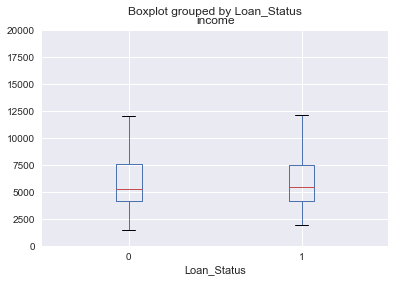

In [27]:
train_dataset.boxplot(column = "income",by ="Loan_Status")
plt.ylim(0, 20000)

#### Loan Approval Analysis w.r.t to EMI to income ratio

(0.0, 0.07)

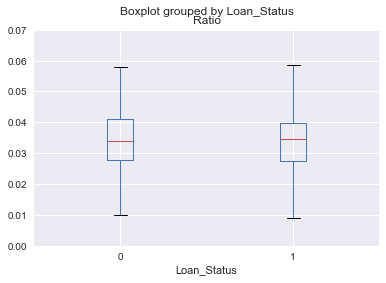

In [28]:
train_dataset.boxplot(column = "Ratio",by ="Loan_Status")
plt.ylim(0.0, 0.07)

#### Gender Analysis w.r.t Loan Approval

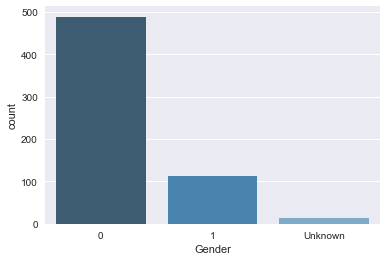

In [29]:
sns.countplot(x="Gender", data=train_dataset, palette="Blues_d")

In [30]:
gender_grp = train_dataset.Loan_Status.groupby([train_dataset.Gender,train_dataset.Loan_Status])
gender_size = gender_grp.size()
Approve_loan_male = (gender_size[0][1]/(gender_size[0][1] + gender_size[0][0]))*100
Approve_loan_female = (gender_size[1][1]/(gender_size[1][1] + gender_size[1][0]))*100
d = {'Gender' : pd.Series([Approve_loan_male, Approve_loan_female], 
                                     index =['Approve_loan_male', 'Approve_loan_female'])}
loan = pd.DataFrame(d)
print("Approval percentage Male: ", Approve_loan_male)
print("Approval percentage Female: ", Approve_loan_female)

Approval percentage Male:  69.3251533742
Approval percentage Female:  66.9642857143


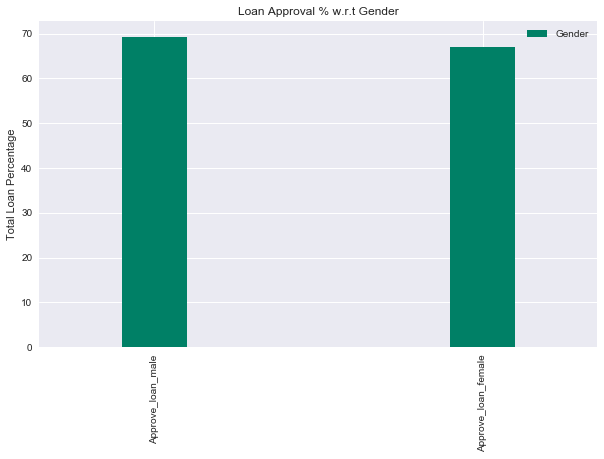

In [31]:
#Plotting Loan approval Percentage
loan.plot(kind='bar', stacked=False, figsize=[10,6], width = 0.2, cmap= plt.cm.summer)
plt.ylabel('Total Loan Percentage')
plt.title('Loan Approval % w.r.t Gender')
plt.show()

#### Marital Status Analysis w.r.t Loan Approval

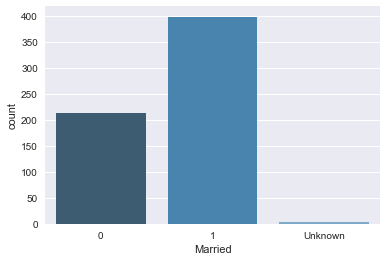

In [32]:
sns.countplot(x="Married", data=train_dataset, palette="Blues_d")

In [33]:
mrg_grp = train_dataset.Married.groupby([train_dataset.Married,train_dataset.Loan_Status])
mrg_size = mrg_grp.size()
Approve_loan_unmarried = (mrg_size[0][1]/(mrg_size[0][1] + mrg_size[0][0]))*100
Approve_loan_married = (mrg_size[1][1]/(mrg_size[1][1] + mrg_size[1][0]))*100
d = {'Marital Status' : pd.Series([Approve_loan_married, Approve_loan_unmarried], 
                          index = ['Approve_loan_married', 'Approve_loan_unmarried'])}
loan = pd.DataFrame(d)
print("Approval percentage Married: ", Approve_loan_married)
print("Approval percentage Unmarried: ", Approve_loan_unmarried)

Approval percentage Married:  71.608040201
Approval percentage Unmarried:  62.9107981221


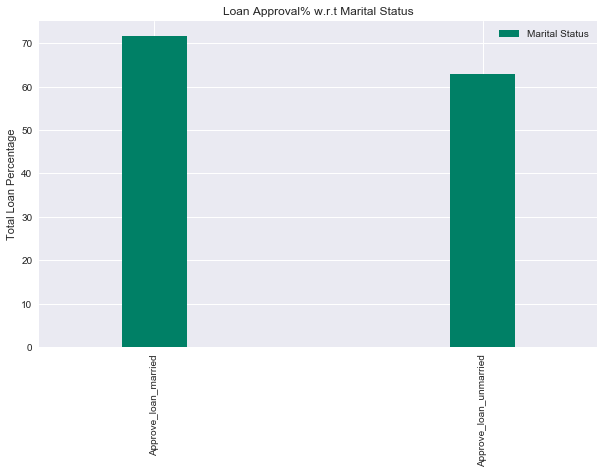

In [34]:
#Plotting Loan approval Percentage
loan.plot(kind='bar', stacked=False, figsize=[10,6], width = 0.2, cmap= plt.cm.summer)
plt.ylabel('Total Loan Percentage')
plt.title('Loan Approval% w.r.t Marital Status')
plt.show()

#### Employment Analysis w.r.t Loan Approval

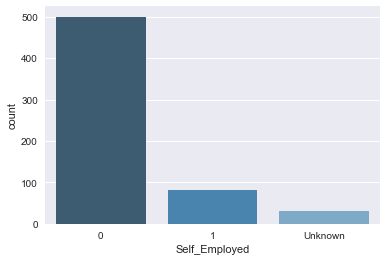

In [35]:
sns.countplot(x="Self_Employed", data=train_dataset, palette="Blues_d")

In [36]:
emp_grp = train_dataset.Self_Employed.groupby([train_dataset.Self_Employed,train_dataset.Loan_Status])
emp_size = emp_grp.size()
Approve_loan_SE = (emp_size[1][1]/(emp_size[1][1] + emp_size[1][0]))*100
Approve_loan_NSE = (emp_size[0][1]/(emp_size[0][1] + emp_size[0][0]))*100
d = {'Employment' : pd.Series([Approve_loan_SE, Approve_loan_NSE], 
                                index = ['Self-Emplyeed', 'Not-Self-Employeed'])}
loan = pd.DataFrame(d)
print("Approval percentage Self_Employed: ", Approve_loan_SE)
print("Approval percentage Not_Self_Employed: ", Approve_loan_NSE)

Approval percentage Self_Employed:  68.2926829268
Approval percentage Not_Self_Employed:  68.6


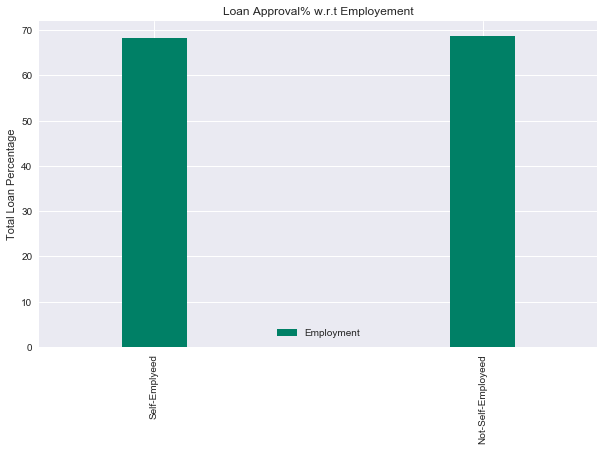

In [37]:
#Plotting Loan approval Percentage
loan.plot(kind='bar', stacked=False, figsize=[10,6], width = 0.2, cmap= plt.cm.summer)
plt.ylabel('Total Loan Percentage')
plt.title('Loan Approval% w.r.t Employement')
plt.show()

#### Education Analysis w.r.t Loan Approval

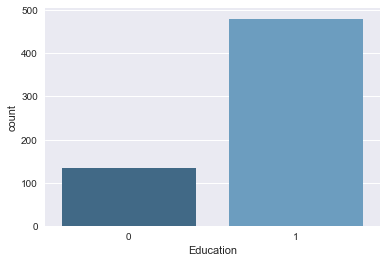

In [38]:
sns.countplot(x="Education", data=train_dataset, palette="Blues_d")

In [39]:
edu_grp = train_dataset.Education.groupby([train_dataset.Education,train_dataset.Loan_Status])
edu_size = edu_grp.size()
Approve_loan_undergraduate= (edu_size[0][1]/(edu_size[0][1] + edu_size[0][0]))*100
Approve_loan_graduate = (edu_size[1][1]/(edu_size[1][1] + edu_size[1][0]))*100
d = {'Education' : pd.Series([Approve_loan_graduate, Approve_loan_undergraduate], 
                            index =['Graduate', 'Undergraduate'])}
loan = pd.DataFrame(d)
print("Approval percentage graduate: ", Approve_loan_graduate)
print("Approval percentage undergraduate: ", Approve_loan_undergraduate)

Approval percentage graduate:  70.8333333333
Approval percentage undergraduate:  61.1940298507


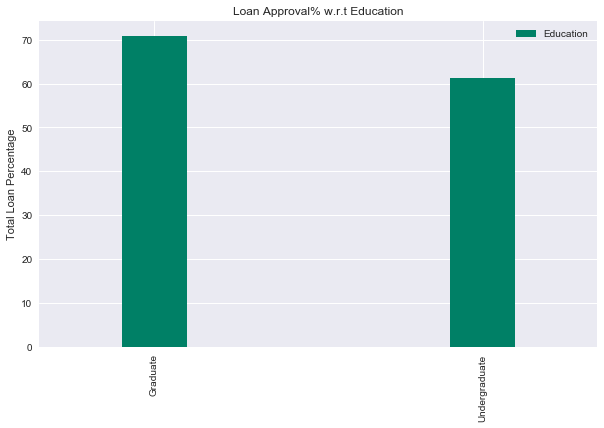

In [40]:
#Plotting Loan approval Percentage
loan.plot(kind='bar', stacked=False, figsize=[10,6], width = 0.2, cmap= plt.cm.summer)
plt.ylabel('Total Loan Percentage')
plt.title('Loan Approval% w.r.t Education')
plt.show()

#### Dependents Analysis w.r.t Loan Approval

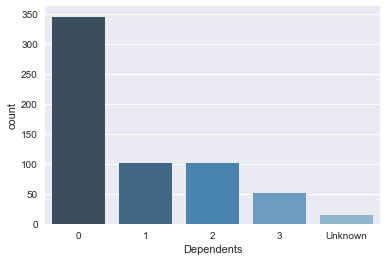

In [41]:
sns.countplot(x="Dependents", data=train_dataset, palette="Blues_d")

In [42]:
dep_grp = train_dataset.Dependents.groupby([train_dataset.Dependents,train_dataset.Loan_Status])
dep_size = dep_grp.size()
Approve_loan_nodep= (dep_size[0][1]/(dep_size[0][1] + dep_size[0][0]))*100
Approve_loan_onedep= (dep_size[1][1]/(dep_size[1][1] + dep_size[1][0]))*100
Approve_loan_twodep= (dep_size[2][1]/(dep_size[2][1] + dep_size[2][0]))*100
Approve_loan_threedep= (dep_size[3][1]/(dep_size[3][1] + dep_size[3][0]))*100
d = {'Dependents' : pd.Series([Approve_loan_nodep, Approve_loan_onedep, Approve_loan_twodep, Approve_loan_threedep], 
                             index =['0','1','2','3+'])}
loan = pd.DataFrame(d)
print("Approval percentage Nodependents: ", Approve_loan_nodep)
print("Approval percentage onedependent: ", Approve_loan_onedep)
print("Approval percentage twodependent: ", Approve_loan_twodep)
print("Approval percentage threedependent:", Approve_loan_threedep)

Approval percentage Nodependents:  68.9855072464
Approval percentage onedependent:  64.7058823529
Approval percentage twodependent:  75.2475247525
Approval percentage threedependent: 64.7058823529


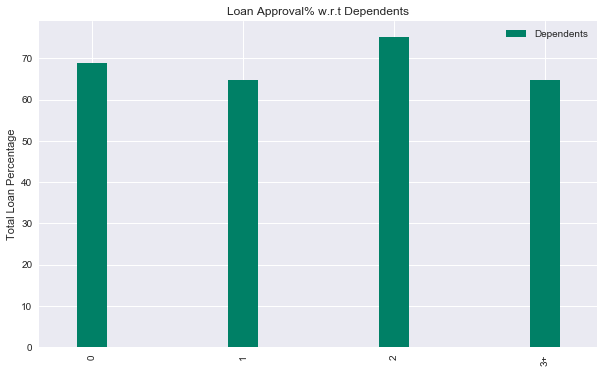

In [43]:
#Plotting Loan approval Percentage
loan.plot(kind='bar', stacked=False, figsize=[10,6], width = 0.2, cmap= plt.cm.summer)
plt.ylabel('Total Loan Percentage')
plt.title('Loan Approval% w.r.t Dependents')
plt.show()

#### Property Type Analysis w.r.t Loan Approval

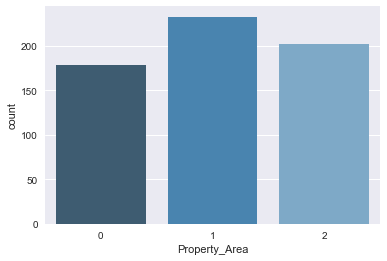

In [44]:
sns.countplot(x="Property_Area", data=train_dataset, palette="Blues_d")

In [45]:
prop_grp = train_dataset.Property_Area.groupby([train_dataset.Property_Area,train_dataset.Loan_Status])
prop_size = prop_grp.size()
Approve_loan_rural= (prop_size[0][1]/(prop_size[0][1] + prop_size[0][0]))*100
Approve_loan_semiurban= (prop_size[1][1]/(prop_size[1][1] + prop_size[1][0]))*100
Approve_loan_urban= (prop_size[2][1]/(prop_size[2][1] + prop_size[2][0]))*100
d = {'Property Type' : pd.Series([Approve_loan_rural, Approve_loan_semiurban,Approve_loan_urban], 
                             index =['Rural','Semiurban','Urban'])}
loan = pd.DataFrame(d)
print("Approval percentage Rural: ", Approve_loan_rural)
print("Approval percentage Semiurban: ", Approve_loan_semiurban)
print("Approval percentage Urban: ", Approve_loan_urban)

Approval percentage Rural:  61.4525139665
Approval percentage Semiurban:  76.8240343348
Approval percentage Urban:  65.8415841584


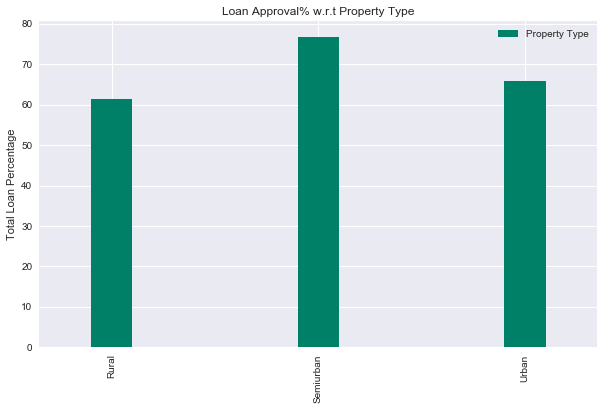

In [46]:
#Plotting Loan approval Percentage
loan.plot(kind='bar', stacked=False, figsize=[10,6], width = 0.2, cmap= plt.cm.summer)
plt.ylabel('Total Loan Percentage')
plt.title('Loan Approval% w.r.t Property Type')
plt.show()

#### Loan Approval Analysis w.r.t Credit History

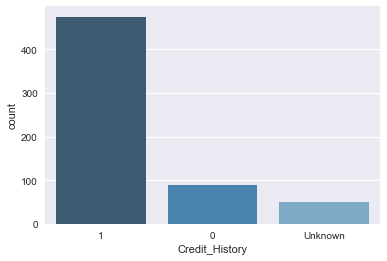

In [47]:
sns.countplot(x="Credit_History", data=train_dataset, palette="Blues_d")

In [48]:
crd_grp = train_dataset.Credit_History.groupby([train_dataset.Credit_History,train_dataset.Loan_Status])
crd_size = crd_grp.size()
Approve_loan_without_CH= (crd_size[0][1]/(crd_size[0][1] + crd_size[0][0]))*100
Approve_loan_with_CH= (crd_size[1][1]/(crd_size[1][1] + crd_size[1][0]))*100
d = {'Credit History' : pd.Series([Approve_loan_with_CH, Approve_loan_without_CH], 
                             index =['Credit History_Yes','Credit History_No'])}
loan = pd.DataFrame(d)
print("Approval percentage with Credit History: ", Approve_loan_with_CH)
print("Approval percentage without Credit History: ", Approve_loan_without_CH)

Approval percentage with Credit History:  79.5789473684
Approval percentage without Credit History:  7.86516853933


### Handling Categorical variables

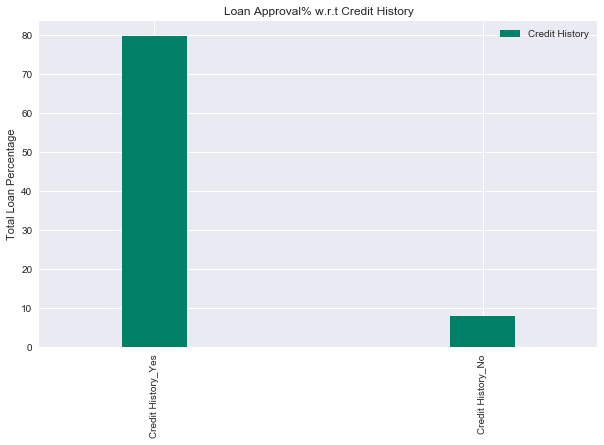

In [49]:
#Plotting Loan approval Percentage
loan.plot(kind='bar', stacked=False, figsize=[10,6], width = 0.2, cmap= plt.cm.summer)
plt.ylabel('Total Loan Percentage')
plt.title('Loan Approval% w.r.t Credit History')
plt.show()

In [50]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Property_Area']
dummy_df = pd.DataFrame()
for i in cat_cols:
    i_dummies = pd.get_dummies(train_dataset[i], prefix = i)
    j = len(i_dummies.columns)
    i_dummies.drop(i_dummies.columns[j-1], axis = 1, inplace = True)
    train_dataset = pd.concat([train_dataset, i_dummies], axis = 1)


In [51]:
# Dropping original columns from train dataset
train_dataset.drop(['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Property_Area'],
                   axis = 1, inplace = True )

In [52]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
Loan_ID             614 non-null object
Education           614 non-null int64
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Loan_Status         614 non-null int64
income              614 non-null float64
Ratio               614 non-null float64
Gender_0            614 non-null uint8
Gender_1            614 non-null uint8
Married_0           614 non-null uint8
Married_1           614 non-null uint8
Dependents_0        614 non-null uint8
Dependents_1        614 non-null uint8
Dependents_2        614 non-null uint8
Dependents_3        614 non-null uint8
Self_Employed_0     614 non-null uint8
Self_Employed_1     614 non-null uint8
Credit_History_0    614 non-null uint8
Credit_History_1    614 non-null uint8
Property_Area_0     614 non-null uint8
Property_Area_1     614 non-null uint8
dtypes: float64(4), int64(2), object(1), uint8(14)
memory usage: 42

In [53]:
#Rearranging the columns of the dataset
train_dataset = train_dataset[['Loan_ID','Education','income','Ratio','LoanAmount','Loan_Amount_Term',
                              'Gender_0','Gender_1','Married_0','Married_1', 'Dependents_0','Dependents_1','Dependents_2',
                              'Dependents_3','Self_Employed_0','Self_Employed_1','Credit_History_0','Credit_History_1',
                              'Property_Area_0','Property_Area_1', 'Loan_Status']]

In [54]:
cat_cols = ['Gender', 'Dependents', 'Self_Employed', 'Credit_History', 'Property_Area']
dummy_df = pd.DataFrame()
for i in cat_cols:
    i_dummies = pd.get_dummies(test_dataset[i], prefix = i)
    j = len(i_dummies.columns)
    i_dummies.drop(i_dummies.columns[j-1], axis = 1, inplace = True)
    test_dataset = pd.concat([test_dataset, i_dummies], axis = 1)

In [55]:
# encoding for Married column to keep the features same in both train and test dataset.
Married_dummies = pd.get_dummies(test_dataset.Married, prefix='Married')
test_dataset = pd.concat([test_dataset, Married_dummies], axis = 1)

In [56]:
# Dropping original columns from test dataset
test_dataset.drop(['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Property_Area'],
                   axis = 1, inplace = True )

In [57]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 21 columns):
Loan_ID             367 non-null object
Education           367 non-null int64
LoanAmount          367 non-null float64
Loan_Amount_Term    367 non-null float64
Loan_Status         0 non-null float64
income              367 non-null int64
Ratio               367 non-null float64
Gender_0            367 non-null uint8
Gender_1            367 non-null uint8
Dependents_0        367 non-null uint8
Dependents_1        367 non-null uint8
Dependents_2        367 non-null uint8
Dependents_3        367 non-null uint8
Self_Employed_0     367 non-null uint8
Self_Employed_1     367 non-null uint8
Credit_History_0    367 non-null uint8
Credit_History_1    367 non-null uint8
Property_Area_0     367 non-null uint8
Property_Area_1     367 non-null uint8
Married_0           367 non-null uint8
Married_1           367 non-null uint8
dtypes: float64(4), int64(2), object(1), uint8(14)
memory usage: 25.2

In [58]:
#Rearranging the columns of the dataset
test_dataset = test_dataset[['Loan_ID','Education','income','Ratio','LoanAmount','Loan_Amount_Term',
                              'Gender_0','Gender_1','Married_0','Married_1', 'Dependents_0','Dependents_1','Dependents_2',
                              'Dependents_3','Self_Employed_0','Self_Employed_1','Credit_History_0','Credit_History_1',
                              'Property_Area_0','Property_Area_1', 'Loan_Status']]

In [59]:
#Defining dependent and independent variables
x_train = train_dataset.iloc[:, 1:-1]
y_train = train_dataset.iloc[:, 20]
x_test = test_dataset.iloc[:, 1:-1]
y_test = test_dataset.iloc[:, 20]

### Standardising the data

In [60]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

The below models will be validated to select the best Machine Learning Model.
                        1. Logistic Regression
                        2. Decision Tree
                        3. Random Forest
                        4. KNN
                        5. SVM

### Logistic Regression

In [61]:
#Performing Grid Search
tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }
LR_model= LogisticRegression()
LR_grid= GridSearchCV(LR_model, tuned_parameters,cv=10)
LR_grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [62]:
print(LR_grid.best_params_)

{'C': 0.01, 'penalty': 'l1'}


In [63]:
print(LR_grid.best_score_)

0.809446254072


In [64]:
LR = LogisticRegression(C = 0.01, penalty='l1', random_state= 0)
LR = LR.fit(x_train,y_train)

In [65]:
y_pred = LR.predict(x_train)

In [66]:
confusion_matrix=metrics.confusion_matrix(y_train,y_pred)
confusion_matrix

array([[ 82, 110],
       [  7, 415]])

In [67]:
metrics.accuracy_score(y_train, y_pred)

0.80944625407166126

### Decision Tree

In [68]:
#Performing Grid Search
tuned_parameters={'min_samples_split' : range(5,100,5),'max_depth': range(1,50,2)}
DT_tree=tree.DecisionTreeClassifier()
DT_grid=GridSearchCV(DT_tree,tuned_parameters,cv =10)
DT_grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 100, 5), 'max_depth': range(1, 50, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [69]:
print(DT_grid.best_params_)

{'max_depth': 3, 'min_samples_split': 35}


In [70]:
print(DT_grid.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=35, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [71]:
print(DT_grid.best_score_)

0.811074918567


In [72]:
#Fitting classifier to training set
DT = DecisionTreeClassifier(max_depth=3, min_samples_split = 25, random_state= 123)
DT = DT.fit(x_train,y_train)

In [73]:
y_pred = DT.predict(x_train)

In [74]:
confusion_matrix=metrics.confusion_matrix(y_train,y_pred)
confusion_matrix

array([[106,  86],
       [ 20, 402]])

In [75]:
metrics.accuracy_score(y_train, y_pred)

0.82736156351791534

### Random Forest

In [80]:
tuned_parameters = {'min_samples_leaf': range(5,200,5), 
                    'min_samples_split': range(5,100,5),
                    'n_estimators' : range(5,250,5), 
                    'max_depth': range(5,50,5),
                    'criterion': ['entropy'],
                    'max_features':['auto','sqrt','log2']
                    }
RF_model = RandomForestClassifier()
RF_grid= RandomizedSearchCV(RF_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=30,n_jobs= -1,random_state= 123)
RF_grid.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'min_samples_leaf': range(5, 200, 5), 'min_samples_split': range(5, 100, 5), 'n_estimators': range(5, 250, 5), 'max_depth': range(5, 50, 5), 'criterion': ['entropy'], 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [81]:
print(RF_grid.best_params_)

{'n_estimators': 110, 'min_samples_split': 70, 'min_samples_leaf': 15, 'max_features': 'auto', 'max_depth': 15, 'criterion': 'entropy'}


In [82]:
print(RF_grid.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=15,
            min_samples_split=70, min_weight_fraction_leaf=0.0,
            n_estimators=110, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [103]:
print(RF_grid.best_score_)

0.812703583062


In [83]:
#Fitting classifier to training set
RF = RandomForestClassifier(max_depth = 15, min_samples_split=70, 
                            n_estimators = 110, min_samples_leaf = 15, 
                            max_features= 'auto',criterion = "entropy", random_state = 123)
RF = RF.fit(x_train,y_train)

In [84]:
y_pred = DT.predict(x_train)

In [85]:
confusion_matrix=metrics.confusion_matrix(y_train,y_pred)
confusion_matrix

array([[106,  86],
       [ 20, 402]])

In [86]:
metrics.accuracy_score(y_train, y_pred)

0.82736156351791534

### KNN
* we are getting accuracy score as 1 in Training set which indicates overfitting

In [87]:
tuned_parameters = {'n_neighbors': range(1,20,1), 
                    'weights': ['distance'], 
                    'algorithm':['auto']}
KN_model = KNeighborsClassifier()
KN_grid = GridSearchCV(KN_model,tuned_parameters, cv =10)
KN_grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20), 'weights': ['distance'], 'algorithm': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [88]:
print(KN_grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 19, 'weights': 'distance'}


In [89]:
print(KN_grid.best_score_)

0.799674267101


In [90]:
print(KN_grid.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='distance')


In [91]:
#Fitting classifier to training set
KN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='distance')
KN = KN.fit(x_train,y_train)

In [92]:
y_pred = KN.predict(x_train)

In [93]:
confusion_matrix=metrics.confusion_matrix(y_train,y_pred)
confusion_matrix

array([[192,   0],
       [  0, 422]])

In [94]:
metrics.accuracy_score(y_train, y_pred)

1.0

### SVM

In [95]:
# with rbf kernel
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
SVM_model = SVC()
SVM_grid = GridSearchCV(SVM_model,tuned_parameters, cv =5)
SVM_grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [96]:
print(SVM_grid.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [97]:
SVM = SVC(C= 1, gamma= 0.001, kernel= 'rbf')
SVM = SVM.fit(x_train,y_train)
y_pred = SVM.predict(x_train)

In [98]:
confusion_matrix=metrics.confusion_matrix(y_train,y_pred)
confusion_matrix

array([[ 82, 110],
       [  7, 415]])

In [99]:
metrics.accuracy_score(y_train, y_pred)

0.80944625407166126

In [100]:
# with Linear Kernel
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10]}]
SVM_model = SVC()
SVM_grid = GridSearchCV(SVM_model,tuned_parameters, cv =5)
SVM_grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [101]:
print(SVM_grid.best_params_)

{'C': 1, 'kernel': 'linear'}


In [102]:
SVM = SVC(C= 1, kernel= 'linear')
SVM = SVM.fit(x_train,y_train)
y_pred = SVM.predict(x_train)

In [103]:
confusion_matrix=metrics.confusion_matrix(y_train,y_pred)
confusion_matrix

array([[ 82, 110],
       [  7, 415]])

In [104]:
metrics.accuracy_score(y_train, y_pred)

0.80944625407166126

### Submission File

In [98]:
y_pred = RF.predict(x_test)

In [99]:
submit = test_dataset['Loan_ID']

In [100]:
preds = pd.Series(y_pred)
submit = pd.concat([submit, preds], names=['Loan_ID', 'Loan_Status'], axis=1)
submit.columns = ['Loan_ID', 'Loan_Status']

In [101]:
submit.to_csv('loan.csv', index=False)

In [102]:
sub = pd.read_csv("D:/Machine Learning/UPX/Projects/Machine Learning Projects/Datasets/Loan_prediction/loan.csv")

In [103]:
sub["Loan_Status"] = sub["Loan_Status"].apply(lambda Loan_Status: 'Y' if Loan_Status == 1 else 'N')

In [104]:
sub.to_csv('Sample_Submission.csv', index=False)